<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: Luis R. Corzo

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [57]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [58]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

df1 = df.loc[0:10]

#print(df)

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

Summary table: 

Intercept: 2.55001  Std error: 1.41867  

Slope: 0.55010  Std error: 0.14872  

Sigma hat squared: 1.55975  

Coefficient of determiation (Goodness-of-fit):  0.65988




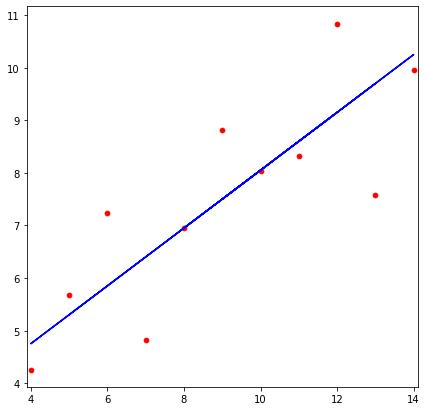

In [85]:
df1 = df.loc[0:10]

x1 = df1.iloc[0:11,1]
y1 = df1.iloc[0:11,2]
n = len(x1)

plt.subplots(nrows=1, ncols=1, figsize=(7,7)) 
plt.scatter(x1, y1,22, c = "red")

###################################################

def computeLine(x_sample, y_sample,n):
    
    std_x = np.std(x_sample)
    mean_x = np.mean(x_sample)
    
    std_y = np.std(y_sample)
    mean_y = np.mean(y_sample)
    
    z_vals = []
    
    for i in range(n):
        
        z_val1 = (x_sample[i] - mean_x)/std_x
        z_val2 = (y_sample[i] - mean_y)/std_y
        
        product = z_val1 * z_val2
        z_vals.append(product)
    
    sumation = np.sum(z_vals)
    
    r =  sumation/(n-1)
    
    m = r * (std_y / std_x)
    
    b = mean_y - (m * mean_x)
    
    return m, b

###################################################

def computeVar_hat(x_sample, y_sample, n, m, b):
    
    rss = []
    
    for i in range(n):
        
        y_hat = m * x_sample[i] + b
        
        rss.append((y_sample[i] - y_hat)**2) 
    
    var_hat = np.sum(rss)/(n-2)
    
    return var_hat

###################################################

def computeR_sq(x_sample, y_sample, n, m, b):

    sse = []
    sst = []
    
    mean_y = np.mean(y_sample)
    
    for i in range(n):
        
        y_hat = m * x_sample[i] + b
        
        sse.append((y_hat - y_sample[i])**2) 
        sst.append((y_sample[i] - mean_y)**2) 
    
    
    sse = np.sum(sse)
    sst = np.sum(sst)
    
    ret = 1 - (sse/sst)
    return ret

###################################################

def computeSE_Estimators(x_sample, y_sample, n, m, b):
    
    sse = []
    temp =[]
    mean_y = np.mean(y_sample)
    mean_x = np.mean(x_sample)
    
    for i in range(n):
        
        y_hat = m * x_sample[i] + b
        
        sse.append((y_hat - y_sample[i])**2)
        temp.append((x_sample[i] - mean_x)**2)
    
    sse = np.sum(sse)
    temp = np.sum(temp)
    
    s = sse/(n-2)
    
    SE_beta0_hat = s * np.sqrt((1/n)+((mean_x**2)/temp))
    SE_beta1_hat = s * np.sqrt(1/temp)
    
    return SE_beta0_hat, SE_beta1_hat
    

###################################################

m,b = computeLine(x1, y1, n)

var_hat = computeVar_hat(x1, y1, n, m, b)
R_sq = computeR_sq(x1, y1, n, m, b)
SE_estimators = computeSE_Estimators(x1, y1, n, m, b)


plt.plot(x1, m*x1+b, c = "b")

###################################################
print("Summary table: ")

print("\nIntercept:", format(b, '.5f'), " Std error:", format(SE_estimators[0], '.5f')," \n\nSlope:", format(m, '.5f'), " Std error:", format(SE_estimators[1], '.5f'), " \n\nSigma hat squared:", format(var_hat, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq, '.5f'))

print("\n")


plt.xlim([3.9, 14.1])
plt.show()

- linear model:

$
 \qquad y \;=\; 2.55 + 0.55x
$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

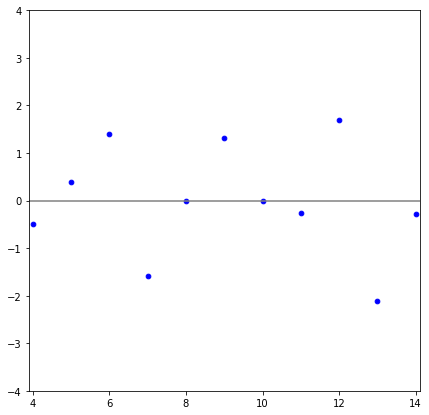

In [60]:
plt.subplots(nrows=1, ncols=1, figsize=(7,7)) 


def get_residuals(x1,y1, m, b):
    
    residuals = []
    
    for i in range(len(x1)):
        
        y_hat = m*x1[i]+b
            
        residual = y1[i] - y_hat
        
        residuals.append(residual)
    
    return residuals

y_residuals = get_residuals(x1,y1,m,b)

plt.scatter(x1, y_residuals ,22, c = "blue")

plt.plot([-0.1,1,2,3,4,5,6,7,8,9,10,11,12,14,14.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], c = "grey")

plt.xlim([3.9, 14.1])
plt.ylim([-4, 4])
plt.show()

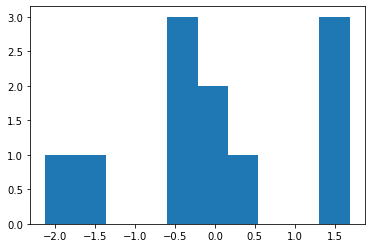

In [61]:
plt.hist(y_residuals)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

The 4 major assumptions of the SLR model are the following: 
- Linear relationship between x and y.
- Error/residual independence.
- Error/residual homoskedasticity - the errors/residuals have constant variance at every level of x.
- Error/residual normaility - the errors/residuals are normally distributed.


-The data meets the first assumption because by looking at the plot in part A), we can see that the points fall on the path of a straight line. That is, the data points seem to follow a linear relationship.

-The data also meets assumption number 2 because by looking at the plot in B), the residuals do not seem to be following any consecutive patterns. 

-By looking at the plot in B), I'd say that the data does not meet the third assumption because even though there is no noticeable repeating patterns in the fitted-vals vs residuals scatter plot, the residuals seem to be slightly spreading apart from left to right. (It could be a perception error, anyhow I still want to check if I can fix that slight spreading through transformations.)

-Finally, we can also see that the data does not meet the fourth assumption by looking at the the histogram above and the Q-Q plot below. By looking at the histogram above, we can see that the residuals seem to not be following a normal distribution. Similarly, if the sample quantiles compared to the theoretical normal quantiles do not consistently fall close along the Q-Q plot line, we can say that our residuals don't follow a normal distribution. 

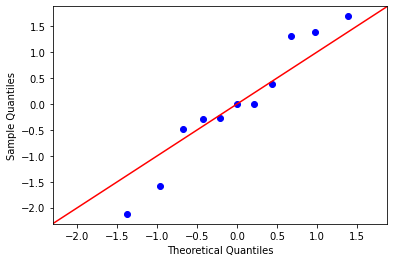

In [62]:
a=np.array(y_residuals)
sm.qqplot(a, line='45')
plt.show()


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

- First, I am going to look for outliers to be removed and see if that makes our data meet assumptions 3 and 4. Another way to achieve "homoskedasticity" and "residual normality" in our data, is to apply non-linear transformations to either one or both of our variables $x$ and $y$.

We could take the log, square root, or reciprocal of our variables. For example, for every $x$, we will try to predict the natural log of $y$. Similarly, we can take $ln(x)$ instead of $x$ as our predictor. (-we can also try using squared roots or reciprocals instead of natural logs as in the two previous examples.) I am going to take the log, sq root, and reciprocal of our $x$ and $y$ values to make a new set of y values. Then I will redo our processes in part a) and b) to see if assumptions 3 and 4 are finally met.

In [63]:

def look4outliers(y_residuals):
    
    iqr = stats.iqr(y_residuals)

    lower = np.percentile(y_residuals, 25) - (1.5*iqr)
    upper = np.percentile(y_residuals, 75) + (1.5*iqr)

    print("IQR: (", lower, ",", upper,")")

    check = 0
    for i in range(len(y_residuals)):

        if y_residuals[i] < lower:
            print("\n Outlier found: ",y_residuals[i])
            check = 1

        if y_residuals[i] > upper:
            print("\n Outlier found: ",y_residuals[i])
            check = 1

    if check == 0:
        print("\n No outliers found.")
        
        
look4outliers(y1)

IQR: ( 2.9324999999999983 , 11.9525 )

 No outliers found.


- From the code above we can be sure that there are no outliers in our data. Therefore, we should try out the different non-linear transformations on our variables to see if they help with assuring homoskedasticity and residual normality.

Summary table: 

Intercept: -2.17192 ,  Std error: 2.47832  

Slope: 4.54716 ,  Std error: 1.14615  

Sigma hat squared: 1.47457  

Coefficient of determiation (Goodness-of-fit):  0.67845


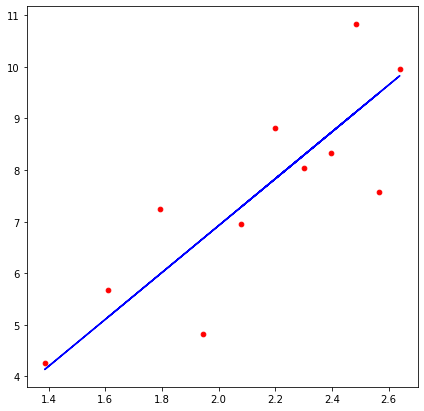

In [64]:
y_prime = y1
#y_prime = np.log(y1)
#y_prime = np.sqrt(y1)
#y_prime = 1/y1

#x_prime = x1
x_prime = np.log(x1)
#x_prime = np.sqrt(x1)
#x_prime = 1/x1

plt.subplots(nrows=1, ncols=1, figsize=(7,7)) 
plt.scatter(x_prime, y_prime, 22, c = "red")

###################################################

m_prime,b_prime = computeLine(x_prime, y_prime, n)

var_hat_prime = computeVar_hat(x_prime, y_prime, n, m_prime, b_prime)

R_sq_prime = computeR_sq(x_prime, y_prime, n, m_prime, b_prime)

SE_estimators_prime = computeSE_Estimators(x_prime, y_prime, n, m_prime, b_prime)

plt.plot(x_prime, m_prime*x_prime+b_prime, c = "b")

###################################################
print("Summary table: ")

print("\nIntercept:", format(b_prime, '.5f'),  ",  Std error:", format(SE_estimators_prime[0], '.5f'), " \n\nSlope:", format(m_prime, '.5f'), ",  Std error:", format(SE_estimators_prime[1], '.5f'), " \n\nSigma hat squared:", format(var_hat_prime, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq_prime, '.5f'))

#plt.xlim([3.9, 14.1])
plt.show()

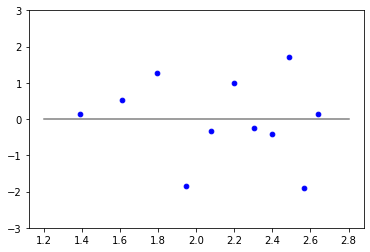

In [65]:
y_prime_residuals = get_residuals(x_prime, y_prime, m_prime, b_prime)

plt.scatter(x_prime, y_prime_residuals ,22, c = "blue")

#plt.plot([3,15], [0,0], c = "grey")
plt.plot([1.2,2.8], [0,0], c = "grey")

#plt.xlim([3.9, 14.1])
plt.ylim([-3, 3])
plt.show()

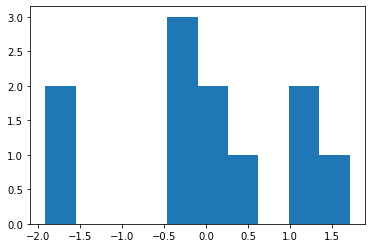

In [66]:
plt.hist(y_prime_residuals)
plt.show()

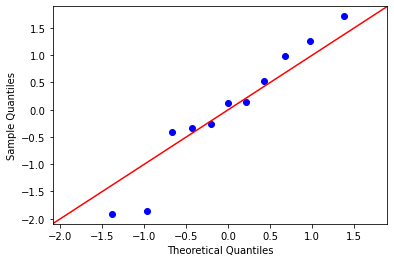

In [67]:
ap=np.array(y_prime_residuals)
sm.qqplot(ap,line='45')
plt.show()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Even though one could argue that the data met assumption 3, I still wanted to check if I could fix that slight spreading-apart behavior. In order to address assumption 4, I took the square root of our independent variable $x$ while leaving the dependent variable $y$ unchanged. By looking at the histogram and Q-Q plot, it looks like we did achieve a better residual normality than in part B).

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

Summary table: 

Intercept: 2.55091 ,  Std error: 1.42003  

Slope: 0.55000 ,  Std error: 0.14886  

Sigma hat squared: 1.56125  

Coefficient of determiation (Goodness-of-fit):  0.65958


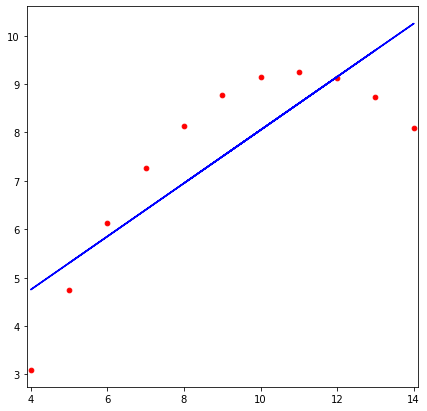

In [86]:
df2 = df.loc[11:21]

x2 = df2.iloc[0:11,1]
y2 = df2.iloc[0:11,2]

x2 = x2.reset_index(drop=True)
y2 = y2.reset_index(drop=True)

n2 = len(y2)

plt.subplots(nrows=1, ncols=1, figsize=(7,7)) 
plt.scatter(x2, y2,22, c = "red")

m2,b2 = computeLine(x2, y2, n2)

var_hat2 = computeVar_hat(x2, y2, n2, m2, b2)

R_sq2 = computeR_sq(x2, y2, n2, m2, b2)

SE_estimators2 = computeSE_Estimators(x2, y2, n2, m2, b2)



print("Summary table: ")

print("\nIntercept:", format(b2, '.5f'), ",  Std error:", format(SE_estimators2[0], '.5f'), " \n\nSlope:", format(m2, '.5f'), ",  Std error:", format(SE_estimators2[1], '.5f'), " \n\nSigma hat squared:", format(var_hat2, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq2, '.5f'))

plt.plot(x2, m2*(x2)+b2, c = "b")

plt.xlim([3.9, 14.1])

plt.show()

- linear model:

$
 \qquad y \;=\; 2.55 + 0.55x
$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

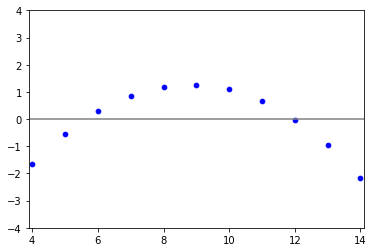

In [69]:
y_residuals2 = get_residuals(x2,y2,m2,b2)

plt.scatter(x2, y_residuals2 ,22, c = "blue")

plt.plot([-0.1,1,2,3,4,5,6,7,8,9,10,11,12,14,14.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], c = "grey")

plt.xlim([3.9, 14.1])
plt.ylim([-4, 4])
plt.show()

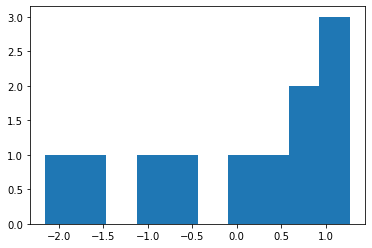

In [70]:
plt.hist(y_residuals2)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

-The data does not meet the first assumption because by looking at the plot in part A), the points do not fall along the path of a straight line. That is, the data points don't seem to follow a linear relationship.

-The data also does not meet assumption number 2 because by looking at the plot in B), the residuals follow the path of an upside down parabola.

-By looking at the plot in B), I'd say that the data does not meet the third assumption because the residuals seem to be spreading further apart on the left and right of the plot compared to the residuals close to the center

-Finally, we can also see that the data does not meet the fourth assumption by looking at the the histogram above and the Q-Q plot below. By looking at the histogram above, we can see that the residuals do not follow a normal distribution. Similarly, the residual sample quantiles compared to the theoretical normal quantiles do not consistently fall close along the Q-Q plot line. Thus,  we can be assured that the residuals don't follow a normal distribution.

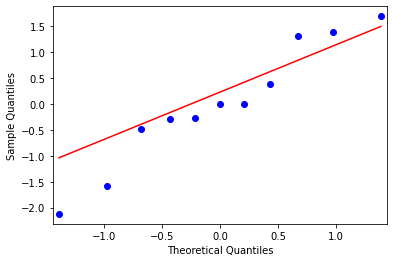

In [71]:
b=np.array(y_residuals2)
sm.qqplot(a, line='q')
plt.show()


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

I am going to skip looking for outliers and see if applying non-linear transformations to our variables $x$ and $y$ could help. I am going to skip looking for outliers because the entirety of our data does not follow a linear relationship. That is, getting rid of possible outliers will not help us fulfill the assumptions but transforming the variables maybe could. (-I say maybe because I want to do some testing with non-linear transformations, even though I know it won't help. We should use quadratic regresion instead.)

Summary table: 

Intercept: 0.58211 ,  Std error: 0.06606  

Slope: 1.00044 ,  Std error: 0.03055  

Sigma hat squared: 0.03930  

Coefficient of determiation (Goodness-of-fit):  0.79304


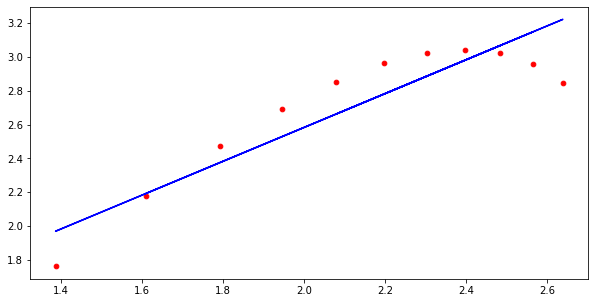

In [72]:
#y_prime2 = y2
#y_prime2 = np.log(y2)
y_prime2 = np.sqrt(y2)
#y_prime2 = 1/y2

#x_prime2 = x2
x_prime2 = np.log(x2)
#x_prime2 = np.sqrt(x2)
#x_prime2 = 1/(x2)

plt.subplots(nrows=1, ncols=1, figsize=(10,5)) 
plt.scatter(x_prime2, y_prime2, 22, c = "red")


###################################################

m_prime2,b_prime2 = computeLine(x_prime2, y_prime2, n)

var_hat_prime2 = computeVar_hat(x_prime2, y_prime2, n, m_prime2, b_prime2)

R_sq_prime2 = computeR_sq(x_prime2, y_prime2, n, m_prime2, b_prime2)

SE_estimators_prime2 = computeSE_Estimators(x_prime2, y_prime2, n, m_prime2, b_prime2)

plt.plot(x_prime2, m_prime2*x_prime2+b_prime2, c = "b")

###################################################
print("Summary table: ")

print("\nIntercept:", format(b_prime2, '.5f'),  ",  Std error:", format(SE_estimators_prime2[0], '.5f'), " \n\nSlope:", format(m_prime2, '.5f'), ",  Std error:", format(SE_estimators_prime2[1], '.5f'), " \n\nSigma hat squared:", format(var_hat_prime2, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq_prime2, '.5f'))

#plt.xlim([3.9, 14.1])
plt.show()

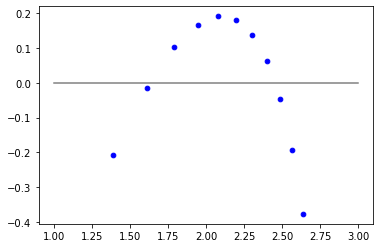

In [73]:
y_prime_residuals2 = get_residuals(x_prime2, y_prime2, m_prime2, b_prime2)

plt.scatter(x_prime2, y_prime_residuals2 ,22, c = "blue")

#plt.plot([3,15], [0,0], c = "grey")
plt.plot([1,3], [0,0], c = "grey")

#plt.xlim([3.9, 14.1])
#plt.ylim([-0.75, 0.75])
plt.show()

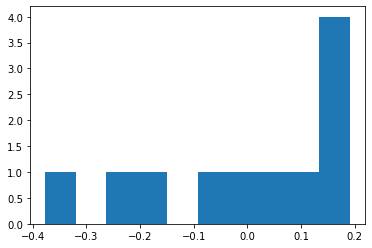

In [74]:
plt.hist(y_prime_residuals2)
plt.show()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Even though I tried to apply different non-linear transformations to check if we could make our dataset meet the 4 assumptions, doing so did not help. I'd say that because we were given data with parabolic behaviour, we should have then used quadratic regresion instead. In other words, given that the data shows a parabolic behaviour, applying a simple linear regression model is unfit.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

Summary table: 

Intercept: 2.55270 ,  Std error: 1.41797  

Slope: 0.54970 ,  Std error: 0.14864  

Sigma hat squared: 1.55899  

Coefficient of determiation (Goodness-of-fit):  0.65966


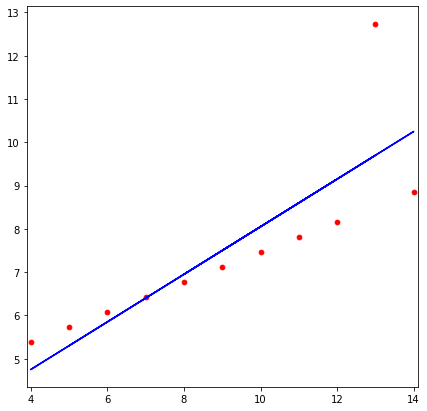

In [87]:
df3 = df.loc[22:33]

x3 = df3.iloc[0:11,1]
y3 = df3.iloc[0:11,2]

x3 = x3.reset_index(drop=True)
y3 = y3.reset_index(drop=True)

n3 = len(y3)

plt.subplots(nrows=1, ncols=1, figsize=(7,7)) 
plt.scatter(x3, y3, 22, c="red")


m3,b3 = computeLine(x3, y3, n3)

var_hat3 = computeVar_hat(x3, y3, n3, m3, b3)

R_sq3 = computeR_sq(x3, y3, n3, m3, b3)

SE_estimators3 = computeSE_Estimators(x3, y3, n3, m3, b3)


print("Summary table: ")

print("\nIntercept:", format(b3, '.5f'), ",  Std error:", format(SE_estimators3[0], '.5f'), " \n\nSlope:", format(m3, '.5f'), ",  Std error:", format(SE_estimators3[1], '.5f'), " \n\nSigma hat squared:", format(var_hat3, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq3, '.5f'))

plt.plot(x3, m3*x3+b3, c = "b")

plt.xlim([3.9, 14.1])

plt.show()

- linear model:

$
 \qquad y \;=\; 2.552 + 0.549x
$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

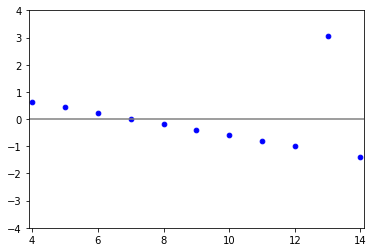

In [76]:
y_residuals3 = get_residuals(x3,y3,m3,b3)

plt.scatter(x3, y_residuals3 ,22, c = "blue")

plt.plot([-0.1,1,2,3,4,5,6,7,8,9,10,11,12,14,14.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], c = "grey")

plt.xlim([3.9, 14.1])
plt.ylim([-4, 4])
plt.show()

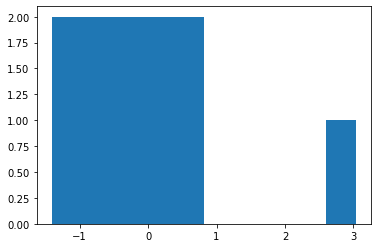

In [77]:
plt.hist(y_residuals3)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

-Except for the outlier, the data does meet the first assumption. By looking at the plot in part A), the points do fall along the path of a straight line. That is, the data points seem to follow a linear relationship.

-I'm am not completely sure if the data also does meet assumption number 2 because one could say that there is a consecutive pattern between the residuals in the sense that they follow an inclined line except for the outlier. However, one could also say that they are not following a consequitive pattern because of that outlier suden random change in the consecutive pattern. After removing the outlier, I'd argue that the change is small enough to not be accounted for and therefore the cleaned data should meet the second assumption.

-By looking at the plot in B), I'd say that the data does meet the third assumption because the residuals seem to keep the same variance at every level of $x$, except for the outlier.

-Finally, by looking at the histogram above, we can see that the residuals would follow a uniform distribution if it wasn't for the outlier at $x=13$. I'd say that the data does meet assumption number 4, because due to our small size in data one could assume that a larger sample size could possibly aproximate a normal distribution.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

I am going to double check if the data point at $x = 13$ is indeed an outlier by using my formula from in question 1. I am not going to use non-linear transformations because I am pretty confident that simply removing the outlier will do the job.

In [78]:
look4outliers(y3)

IQR: ( 3.6549999999999994 , 10.575000000000001 )

 Outlier found:  12.74


Summary table: 

Intercept: 3.67561 ,  Std error: 0.01615  

Slope: 0.38377 ,  Std error: 0.00177  

Sigma hat squared: 0.01702  

Coefficient of determiation (Goodness-of-fit):  0.98765


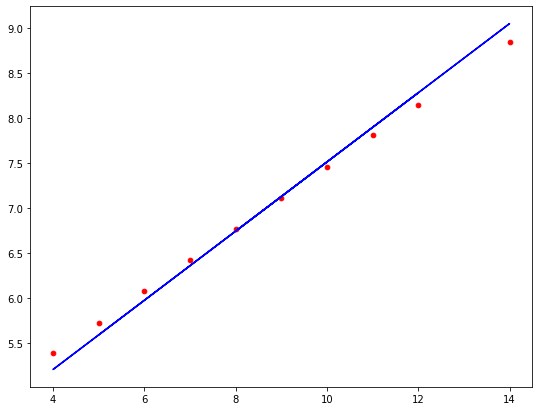

In [79]:
y_prime3 = y3.drop(2)
y_prime3 = y_prime3.reset_index(drop=True)


x_prime3 = x3.drop(2)
x_prime3 = x_prime3.reset_index(drop=True)

n3 = len(x_prime3)

plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 
plt.scatter(x_prime3, y_prime3, 22, c = "red")


###################################################

m_prime3,b_prime3 = computeLine(x_prime3, y_prime3, n3)

var_hat_prime3 = computeVar_hat(x_prime3, y_prime3, n3, m_prime3, b_prime3)

R_sq_prime3 = computeR_sq(x_prime3, y_prime3, n3, m_prime3, b_prime3)

SE_estimators_prime3 = computeSE_Estimators(x_prime3, y_prime3, n3, m_prime3, b_prime3)

plt.plot(x_prime3, m_prime3*x_prime3+b_prime3, c = "b")

###################################################
print("Summary table: ")

print("\nIntercept:", format(b_prime3, '.5f'), ",  Std error:", format(SE_estimators_prime3[0], '.5f'), " \n\nSlope:", format(m_prime3, '.5f'), ",  Std error:", format(SE_estimators_prime3[1], '.5f'), " \n\nSigma hat squared:", format(var_hat_prime3, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq_prime3, '.5f'))

#plt.xlim([3.9, 14.1])
plt.show()

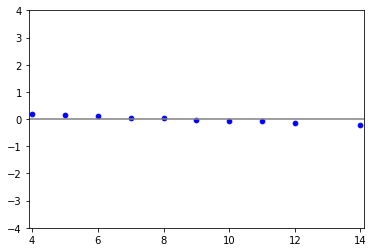

In [80]:
y_prime_residuals3 = get_residuals(x_prime3,y_prime3,m_prime3,b_prime3)

plt.scatter(x_prime3, y_prime_residuals3 ,22, c = "blue")

plt.plot([-0.1,1,2,3,4,5,6,7,8,9,10,11,12,14,14.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], c = "grey")

plt.xlim([3.9, 14.1])
plt.ylim([-4, 4])
plt.show()

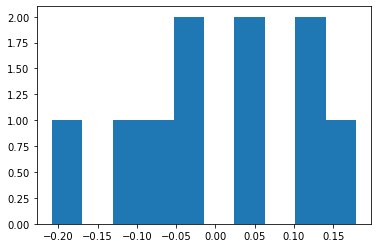

In [81]:
plt.hist(y_prime_residuals3)
plt.show()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

As expected, getting rid of the outlier got us a better fit/regression-line than we originally had. Also, the histogram indicates a higher residual normality than we originally had. (-even though the residual distribution looks a bit skewed.)

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

Summary table: 

Intercept: 2.55181 ,  Std error: 1.41661  

Slope: 0.54990 ,  Std error: 0.14850  

Sigma hat squared: 1.55749  

Coefficient of determiation (Goodness-of-fit):  0.66004


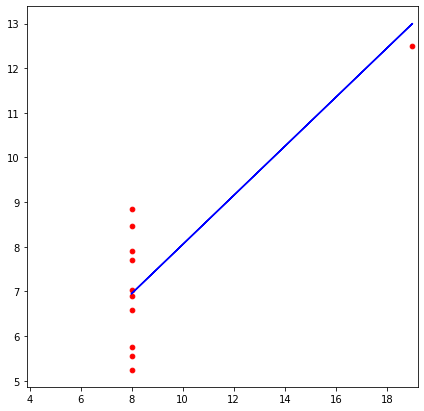

In [88]:
df4 = df.loc[33:43]

x4 = df4.iloc[0:11,1]
y4 = df4.iloc[0:11,2]

x4 = x4.reset_index(drop=True)
y4 = y4.reset_index(drop=True)

n4 = len(y4)

plt.subplots(nrows=1, ncols=1, figsize=(7,7)) 
plt.scatter(x4, y4,22, c = "red")

m4,b4 = computeLine(x4, y4, n4)

var_hat4 = computeVar_hat(x4, y4, n4, m4, b4)

R_sq4 = computeR_sq(x4, y4, n4, m4, b4)

SE_estimators4 = computeSE_Estimators(x4, y4, n4, m4, b4)

print("Summary table: ")

print("\nIntercept:", format(b4, '.5f'), ",  Std error:", format(SE_estimators4[0], '.5f'), " \n\nSlope:", format(m4, '.5f'), ",  Std error:", format(SE_estimators4[1], '.5f'), " \n\nSigma hat squared:", format(var_hat4, '.5f'), " \n\nCoefficient of determiation (Goodness-of-fit): ", format(R_sq4, '.5f'))

plt.plot(x4, m4*x4+b4, c = "b")

plt.xlim([3.9, 19.2])

plt.show()

- linear model:

$
 \qquad y \;=\; 2.551 + 0.549x
$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

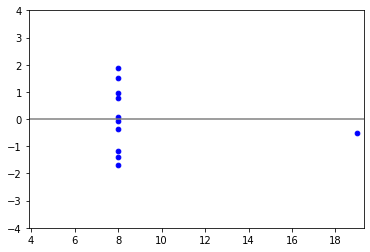

In [83]:
y_residuals4 = get_residuals(x4,y4,m4,b4)

plt.scatter(x4, y_residuals4 ,22, c = "blue")

plt.plot([-0.1,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,19.7], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], c = "grey")

plt.xlim([3.9, 19.3])
plt.ylim([-4, 4])
plt.show()

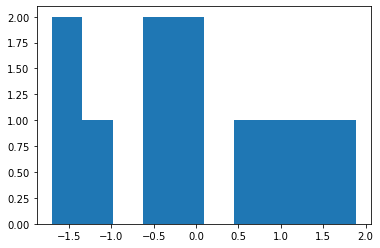

In [84]:
plt.hist(y_residuals4)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

- The data does not follow a linear relationship between $x$ and $y$. Thus, the data fails to meet the first assumption of simple linear regression.

- The residuals do not seem to be following a consecutive pattern. (-The residuals do not follow a pattern of staying negative or positive over different ranges/levels of $x$) Thus, one could say that the data does meet the second assumption.

- The residuals do not seem to have diferent variances. That is they do not seem to spread apart or get closer to each other from left to right, anyhow this is true only because all points are set at the same level of $x$ (-except for the only point to the right).  Therefore one could say that the data meets the third assumption.

- The data fails to meet the fourth assumption. By looking at the residual histogram, it can be seen that the residuals do not follow a normal distribution. 



#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I did not try to perform any adjustments to the data because all the data points, except for the high leverage point, do not show any relationship between the variables $x$ and $y$. Therefore, the simple linear regresion model is not fit for the given data.